### Weather data

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [4]:
with open('city_info.csv','r') as f:
    for line in f:
        print(line)

"","Name","ID","Lat","Lon","Stn.Name","Stn.stDate","Stn.edDate"

"1","Lander","USW00024021",42.8153,-108.7261,"LANDER WBO","1892-01-01","1946-05-28"

"2","Lander","USW00024021",42.8153,-108.7261,"LANDER HUNT FIELD","1946-05-29","2023-12-31"

"3","Cheyenne","USW00024018",41.1519,-104.8061,"CHEYENNE WBO","1871-01-01","1935-08-31"

"4","Cheyenne","USW00024018",41.1519,-104.8061,"CHEYENNE MUNICIPAL ARPT","1935-09-01","2023-12-31"

"5","Wausau","USW00014897",44.9258,-89.6256,"Wausau Record Herald","1896-01-01","1941-12-31"

"6","Wausau","USW00014897",44.9258,-89.6256,"Wausau Airport","1942-01-01","2023-12-31"

"7","Hayward","USW00094973",46.0261,-91.4442,"Hayward RS","1894-01-01","1998-03-31"

"8","Hayward","USW00094973",46.0261,-91.4442,"Hayward Muni AP","1998-04-01","2023-12-31"

"9","EauClaire","USW00014991",44.8664,-91.4878,"Eau Claire City","1893-01-01","1949-09-30"

"10","EauClaire","USW00014991",44.8664,-91.4878,"Eau Claire Chippewa Valley Regional Airport","1949-10-01","2023-12-31"


In [5]:
with open('city_info.csv','r') as f:
    first = f.readline()
    for line in f:
        l = line.strip().split(',')
        lat = l[3]
        lon = l[4]
        name = l[5]
        myfile = l[2]
        start = time.strptime(l[6][1:-1],'%Y-%m-%d')
        end = time.strptime(l[7][1:-1],'%Y-%m-%d')
        print(lat, lon, name, myfile, start, end)

        

42.8153 -108.7261 "LANDER WBO" "USW00024021" time.struct_time(tm_year=1892, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=1, tm_isdst=-1) time.struct_time(tm_year=1946, tm_mon=5, tm_mday=28, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=148, tm_isdst=-1)
42.8153 -108.7261 "LANDER HUNT FIELD" "USW00024021" time.struct_time(tm_year=1946, tm_mon=5, tm_mday=29, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=149, tm_isdst=-1) time.struct_time(tm_year=2023, tm_mon=12, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=365, tm_isdst=-1)
41.1519 -104.8061 "CHEYENNE WBO" "USW00024018" time.struct_time(tm_year=1871, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=1, tm_isdst=-1) time.struct_time(tm_year=1935, tm_mon=8, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=243, tm_isdst=-1)
41.1519 -104.8061 "CHEYENNE MUNICIPAL ARPT" "USW00024018" time.struct_time(tm_year=1935, tm_mon=9, tm_mday=1, tm_hour=0, tm_min=0, tm_s

In [6]:
# read the city data
# print a summary
def read_cityinfo():
    cities=[]
    now = time.strptime('2023-12-31','%Y-%m-%d')
    with open('city_info.csv','r') as f:
        variables = f.readline()
        for line in f:
            l = line.strip().split(',')
            lat = float(l[3])
            lon = float(l[4])
            name = l[5]
            myfile = l[2][1:-1]
            start = time.strptime(l[6][1:-1],'%Y-%m-%d')
            end = time.strptime(l[7][1:-1],'%Y-%m-%d')
            #print(lat,lon,myfile,start,end)
            if end >= now:
                cities.append([myfile, name, start, end, lat, lon])
    return cities

In [7]:
cities = read_cityinfo()
print(cities)

[['USW00024021', '"LANDER HUNT FIELD"', time.struct_time(tm_year=1946, tm_mon=5, tm_mday=29, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=149, tm_isdst=-1), time.struct_time(tm_year=2023, tm_mon=12, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=365, tm_isdst=-1), 42.8153, -108.7261], ['USW00024018', '"CHEYENNE MUNICIPAL ARPT"', time.struct_time(tm_year=1935, tm_mon=9, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=244, tm_isdst=-1), time.struct_time(tm_year=2023, tm_mon=12, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=365, tm_isdst=-1), 41.1519, -104.8061], ['USW00014897', '"Wausau Airport"', time.struct_time(tm_year=1942, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=-1), time.struct_time(tm_year=2023, tm_mon=12, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=365, tm_isdst=-1), 44.9258, -89.6256], ['USW00094973', '"Hayward Muni AP"', time.struct_time(tm_year=1998, tm_mon=4, tm_mday=

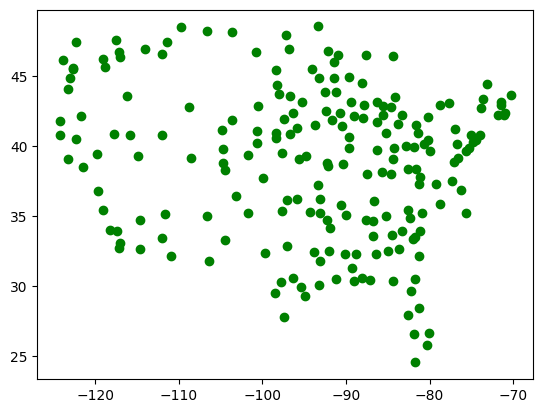

In [8]:
fig = plt.figure()
x = [c[-1] for c in cities]
y = [c[-2] for c in cities]
plt.plot(x,y,'go')
plt.show()

In [9]:
def read_data(cities):
    
    for i,city in enumerate(cities):
        d = []
        thefile = f'{city[0]}.csv'
        print(i,thefile)
        with open(thefile,'r') as f:        
            first = f.readline()
            for line in f:
                theline = line.strip().split(',')
                thetime = time.strptime(theline[1],'%Y-%m-%d')
                try:
                    tmax = float(theline[2])
                    d.append([thetime, tmax])
                except:
                    tmax = None
        cities[i].append(d)

In [10]:
read_data(cities)

0 USW00024021.csv
1 USW00024018.csv
2 USW00014897.csv
3 USW00094973.csv
4 USW00014991.csv
5 USW00094929.csv
6 USW00014839.csv
7 USW00014837.csv
8 USW00014920.csv
9 USW00014898.csv
10 USW00003859.csv
11 USW00013736.csv
12 USW00014894.csv
13 USW00003860.csv
14 USW00013866.csv
15 USW00003872.csv
16 USW00094298.csv
17 USW00094129.csv
18 USW00024163.csv
19 USW00024157.csv
20 USW00024233.csv
21 USW00013740.csv
22 USW00013737.csv
23 USW00013733.csv
24 USW00014742.csv
25 USW00024127.csv
26 USW00003904.csv
27 USW00012921.csv
28 USW00012960.csv
29 USW00012923.csv
30 USW00023044.csv
31 USW00003927.csv
32 USW00012924.csv
33 USW00013958.csv
34 USW00023047.csv
35 USW00013962.csv
36 USW00013897.csv
37 USW00013893.csv
38 USW00013882.csv
39 USW00094950.csv
40 USW00014944.csv
41 USW00014936.csv
42 USW00014929.csv
43 USC00380072.csv
44 USW00013886.csv
45 USW00013883.csv
46 USW00014778.csv
47 USW00094823.csv
48 USW00013739.csv
49 USW00014711.csv
50 USW00014860.csv
51 USW00094236.csv
52 USC00356749.csv
53 

In [11]:
print(cities[0][-1][-2])

[time.struct_time(tm_year=2023, tm_mon=12, tm_mday=30, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=364, tm_isdst=-1), 29.1]


In [12]:
print(cities[0][-3:-1])

[42.8153, -108.7261]


In [13]:
newdata=[]
for ci in cities:
    lon,lat = ci[-3],ci[-2]
    for ti in ci[-1]:
        if ti[0] == time.strptime('1964-06-13','%Y-%m-%d'):
            newdata.append([lon,lat,ti[1]])
            break

In [14]:
print(len(newdata))
print(newdata[0:3])

202
[[42.8153, -108.7261, 67.0], [41.1519, -104.8061, 71.0], [44.9258, -89.6256, 77.0]]


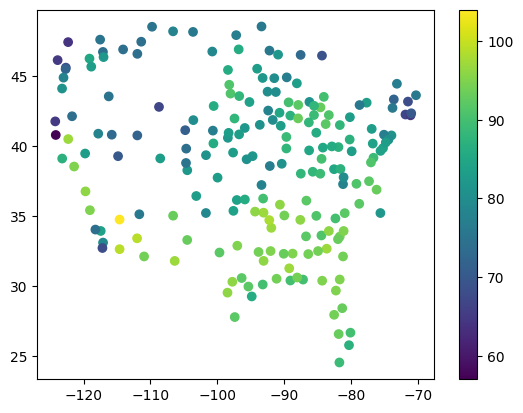

In [15]:
fig = plt.figure()
x = [data[-2] for data in newdata]
y = [data[-3] for data in newdata]
colors = [data[-1] for data in newdata]
plt.scatter(x, y, c=colors, cmap='viridis')
plt.colorbar()
plt.show()

In [16]:
def average_month(month):
    global cities
    newdata = []
    mysum = 0
    count = 0
    for ci in cities:
        lon,lat = ci[-3],ci[-2]
        for ti in ci[-1]:
            year = ti[0].tm_year
            datamonth = ti[0].tm_mon
            if month == datamonth:
                mysum += ti[1]
                count += 1
        mysum /= count        
        newdata.append([lon,lat,mysum])
    return newdata

In [17]:
x = average_month(1)

In [18]:
x[:4]

[[42.8153, -108.7261, 31.902043328409697],
 [41.1519, -104.8061, 20.19290005093391],
 [44.9258, -89.6256, 6.815523851084957],
 [46.0261, -91.4442, 3.249617711106984]]

In [19]:
winterdata=[]
for ci in cities:
    lon,lat = ci[-3],ci[-2]
    for ti in ci[-1]:
        if ti[0] == time.strptime('1964-01-01','%Y-%m-%d'):
            winterdata.append([lon,lat,ti[1]])
            break

In [ ]:
xw, yw, zw = zip(*winterdata)

In [ ]:
fig = plt.figure()
x, y, z = zip(*newdata)
plt.scatter(y,x,c=z,marker='o',s=200,cmap='viridis')
cbar = plt.colorbar()
plt.show()

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(24,18))
ax[0,0].scatter(y,x,c=z,marker='o',cmap='magma')
ax[0,1].tricontourf(y,x,z,200,cmap='magma')
res = ax[1,0].scatter(yw,xw,c=zw,marker='o',cmap='magma')
ax[1,1].tricontourf(yw,xw,zw,200,cmap='magma')
cbar = fig.colorbar(res,ax=ax[:],location='right')
plt.show()